## DAG图

图中有三种类型的节点：输入、输出和op。这些节点通过与量子比特和位对应的有向边连接
其方法包括对节点的增加等等等等

## QuantumCircuit <-> DagCircuit

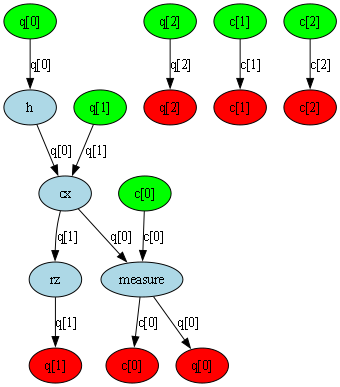

In [8]:
# QuantumCircuit与DAG的相互转化
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
circ.rz(0.5, q[1])
dag = circuit_to_dag(circ)
dag_drawer(dag)

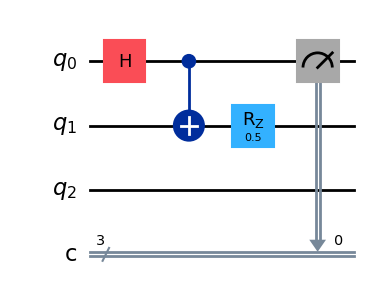

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.circuit.library.standard_gates import CHGate, U2Gate, CXGate
from qiskit.converters import dag_to_circuit
 
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
circ.rz(0.5, q[1])
circuit = dag_to_circuit(dag)
circuit.draw('mpl')

每个节点都是 DAGOpNode 类的一个实例
又可以查看该类对应的属性

In [13]:
node = dag.gate_nodes()
print(node)
print(node[0].name)
print(node[0].matrix)

[DAGOpNode(op=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qargs=(<Qubit register=(3, "q"), index=0>,), cargs=()), DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>), cargs=()), DAGOpNode(op=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[0.5]), qargs=(<Qubit register=(3, "q"), index=1>,), cargs=())]
h
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


修改DAG

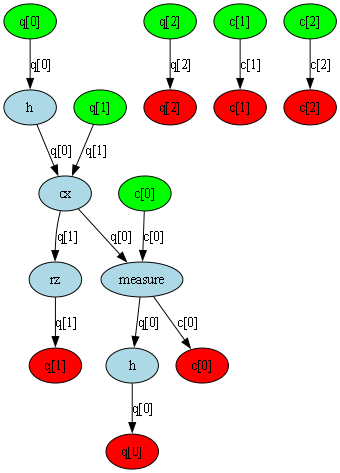

In [14]:
from qiskit.circuit.library import HGate
# 在量子比特输出时添加门
dag.apply_operation_back(HGate(), qargs=[q[0]])
dag_drawer(dag)

用子电路代替某个节点